In [73]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, root_mean_squared_log_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('resources/train.csv')

print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [74]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [76]:
df.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [77]:
print(df.isna().sum().sum())

7829


In [78]:
df.isna().sum().nlargest(81)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [79]:
#df = df.ffill()

In [80]:
#Colonnes conservées
df = df[['Neighborhood','LotArea','OverallQual', 'YearBuilt', 'FullBath',
        'Foundation', 'BsmtQual', 'KitchenQual', 'GarageCars','FireplaceQu',
        'BsmtExposure','GrLivArea', 'TotRmsAbvGrd', '1stFlrSF', 'ExterQual', 'TotalBsmtSF','SalePrice']]

In [81]:
df.isna().sum().nlargest(81)

FireplaceQu     690
BsmtExposure     38
BsmtQual         37
Neighborhood      0
TotalBsmtSF       0
ExterQual         0
1stFlrSF          0
TotRmsAbvGrd      0
GrLivArea         0
GarageCars        0
LotArea           0
KitchenQual       0
Foundation        0
FullBath          0
YearBuilt         0
OverallQual       0
SalePrice         0
dtype: int64

In [82]:
df.loc[df['FireplaceQu'].isnull(), 'FireplaceQu'] = 'NONE'

In [83]:
df.loc[df['BsmtExposure'].isnull(), 'BsmtExposure'] = 'NONE'
df.loc[df['BsmtQual'].isnull(), 'BsmtQual'] = 'NONE'

In [84]:
# Sélectionner les caractéristiques (X) et la cible (y)

Xord = df[['OverallQual', 'BsmtQual', 'KitchenQual','FireplaceQu','ExterQual']]
Xhot = df[['Neighborhood','LotArea', 'YearBuilt', 'FullBath','Foundation', 'GarageCars','BsmtExposure','GrLivArea', 'TotRmsAbvGrd', '1stFlrSF',  'TotalBsmtSF']]
X = df[['Neighborhood','LotArea','OverallQual', 'YearBuilt', 'FullBath',
        'Foundation', 'BsmtQual', 'KitchenQual', 'GarageCars','FireplaceQu',
        'BsmtExposure','GrLivArea', 'TotRmsAbvGrd', '1stFlrSF', 'ExterQual', 'TotalBsmtSF']]  # Caractéristiques pertinentes pour estimer le prix
y = df['SalePrice']  # Ce que l'on cherche à déterminer

In [85]:
one_hot_encoder = OneHotEncoder()
#X = one_hot_encoder.fit_transform(X)
Xhot = one_hot_encoder.fit_transform(Xhot)

overall_qual_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
bsmt_qual_order = ['NONE', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
kitchen_qual_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
fireplace_qual_order = bsmt_qual_order
exter_qual_order = kitchen_qual_order

ordinal_encoder = OrdinalEncoder(categories=[overall_qual_order, bsmt_qual_order, kitchen_qual_order, fireplace_qual_order, exter_qual_order])
Xord = ordinal_encoder.fit_transform(Xord)

In [86]:
#Mettre en DataFrames
Xhot_df = pd.DataFrame(Xhot.toarray())
Xord_df = pd.DataFrame(Xord)

In [87]:
# Concaténer les DataFrames
X = pd.concat([Xhot_df,Xord_df], axis=1)

In [88]:
# Séparer les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [89]:
from datetime import datetime
# Créer un modèle
model_lasso = Lasso(max_iter=30000)
model_rfg = RandomForestRegressor(random_state=42)

# Entraîner le modèle sur les données d'entraînement encodées
model_lasso.fit(X_train, y_train)
model_rfg.fit(X_train, y_train)

y_pred_lasso = model_lasso.predict(X_val)
y_pred_rfg = model_rfg.predict(X_val)

y_pred = (y_pred_lasso + y_pred_rfg) / 2

# Prédire les valeurs sur les données de validation
#y_pred = model_lasso.predict(X_val)

print('TRAINING ENDED AT ',datetime.now())

TRAINING ENDED AT  2024-02-26 12:57:22.901489


In [93]:
y_val

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
526     132000
101     178000
1092    136500
411     145000
1392    123000
Name: SalePrice, Length: 146, dtype: int64

In [94]:
y_pred

array([136975.92315288, 294461.24244946, 124933.33207609, 154977.42239646,
       333978.3040471 ,  79226.02308698, 215994.9457823 , 148667.82765489,
        77626.8900464 , 130417.4814353 , 155536.81071969, 122043.04432293,
       103370.7752386 , 214088.22536004, 179506.18729272, 132352.94060758,
       205350.63241102, 126964.22774684, 123315.31299768, 196470.8004189 ,
       174433.60071771, 238961.16464343, 187787.01643004, 124705.0647429 ,
       190535.41037252, 160131.23573007, 179797.81709208, 107247.4002945 ,
       184195.41298909, 210387.12829898, 127143.88438638, 258443.99822388,
       210474.00612186, 112821.623097  , 262620.85121168, 147153.74202519,
       130187.08351018, 206018.91739723, 297191.48777813, 105542.62676863,
       172630.23902064, 208108.19265096, 110866.49860383, 349049.42169576,
       124188.99444589, 126178.03897821, 111907.7325    , 135752.66829888,
       410391.50049239, 136330.60668886, 122296.84459276, 187426.46536408,
       132140.26764943, 2

In [90]:

#METRICS - Calculer l'exactitude du modèle
print('Metrics generated at : ',datetime.now())
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('RMSE : ',rmse)

mean_percentage_error = (rmse / np.mean(y_val)) * 100
print('Pourcentage d\'erreur : ',mean_percentage_error,'%')

r2 = r2_score(y_val,y_pred)
print('R2 : ',r2)

#A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.
msle = mean_squared_log_error(y_val, y_pred)
print('MSLE : ', msle)

rmsle = root_mean_squared_log_error(y_val, y_pred)
print('RMSLE : ', rmsle)

Metrics generated at :  2024-02-26 12:57:22.908413
RMSE :  40075.063608003606
Pourcentage d'erreur :  21.914587522788004 %
R2 :  0.824223045042297
MSLE :  0.027952720088086306
RMSLE :  0.16719066985955378


In [100]:
# Pourcentage d'écart moyen
diff = np.abs(y_val - y_pred)

# Calculer l'écart moyen
ecart_moyen = np.mean(diff)

max_ecart = np.max(diff)
min_ecart = np.min(diff)

# Calculer la moyenne de y_val
moyenne_y_val = np.mean(y_val)

# Convertir l'écart moyen en pourcentage d'écart moyen
ecart_moyen_pct = (ecart_moyen / moyenne_y_val) * 100

print("Pourcentage d'écart moyen:", ecart_moyen_pct, "%")
print("Plus gros écart constaté :", max_ecart, "€")
print("Plus petit écart constaté :", min_ecart, "€")

Pourcentage d'écart moyen: 11.909134223557508 %
Plus gros écart constaté : 283993.2720382983 €
Plus petit écart constaté : 88.22536003554706 €


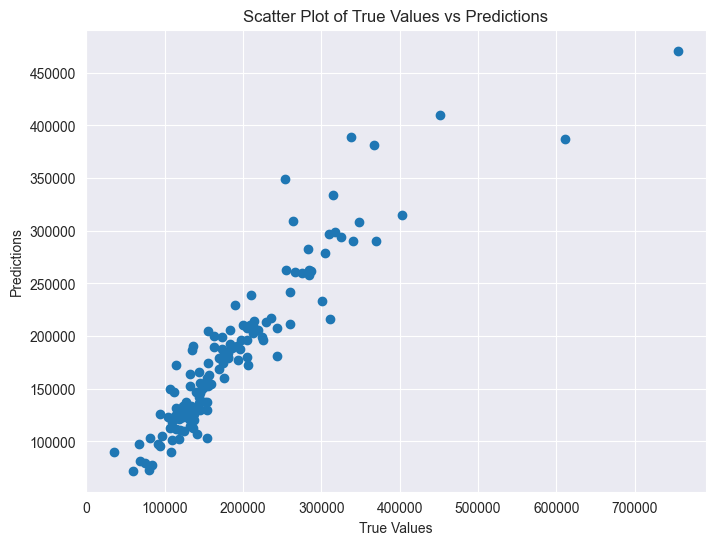

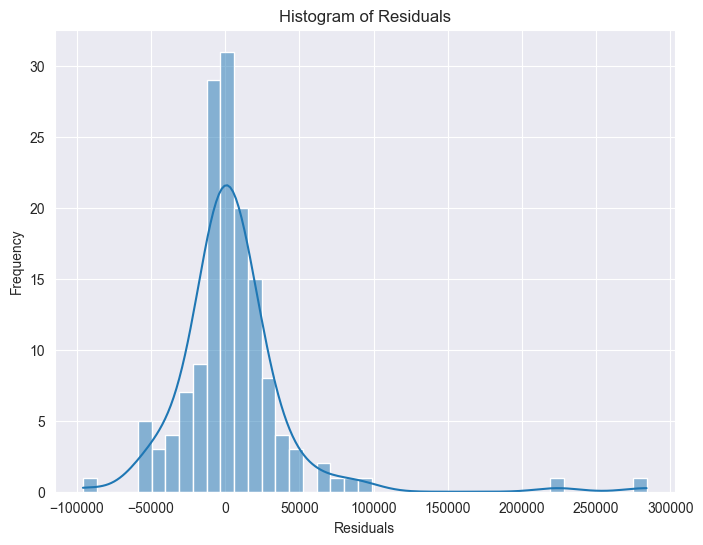

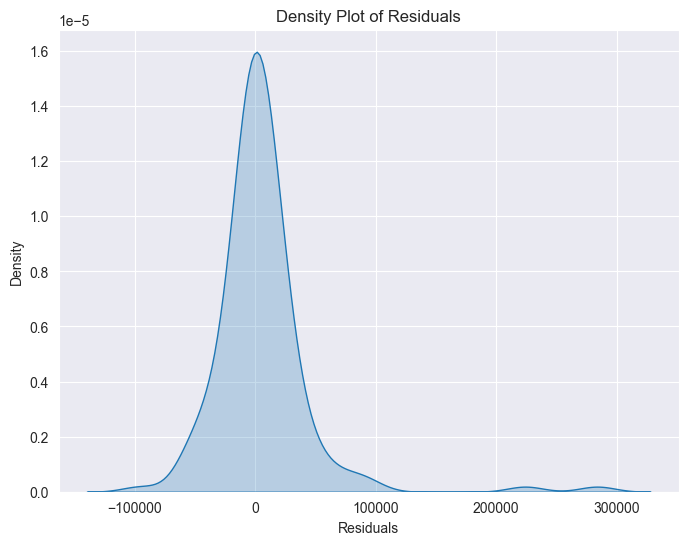

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot des prédictions par rapport aux vraies valeurs
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter Plot of True Values vs Predictions')
plt.show()

# Histogramme des résidus
residuals = y_val - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Courbe de densité des résidus
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals')
plt.show()